In [62]:
# import libraries
import numpy as np
import matplotlib.pyplot as plt
import scipy.integrate as integrate

In [ ]:
# question 4 subpart i

In [89]:
# the question asks us to find the fourier transform of the square pulse and visualize both of them
# the transform requires integral with a complex exponential
# this can be handled by expressing the complex exponential in the rectangular form using euler's formula and integrating them separately

# we first define the function whose fourier transform is to be calculated
def f(A,a,x):
  if(abs(x)<=a): return A
  else: return 0

# we now define the forward_fourier_transform function which returns two values,
# the integrals of the cosine and sine part respectively
def forward_fourier_transform(f,A,a,k):
  cos_integral,cos_error = integrate.quad(lambda x: f(A,a,x)*np.cos(k*x),-a,a,limit=1000)
  sin_integral,sin_error = integrate.quad(lambda x: f(A,a,x)*np.sin(k*x),-a,a,limit=1000)
  return cos_integral/(2*np.pi),-sin_integral/(2*np.pi)


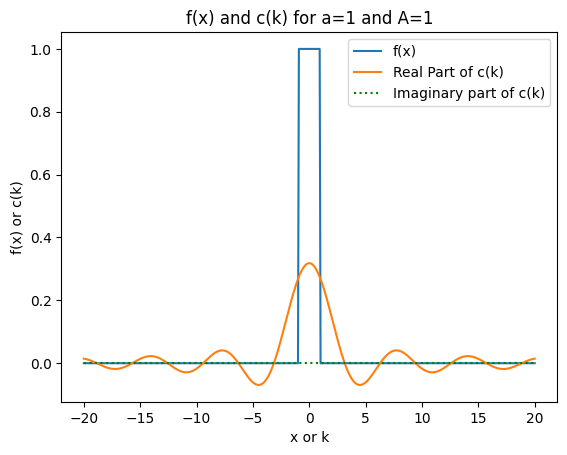

In [91]:
# we vectorize the function and its fourier transform for plotting
v_f = np.vectorize(f)
v_fft = np.vectorize(forward_fourier_transform)

# plotting commands for a = 1 and A = 1
n = 500
k = np.linspace(-20,20,num = n, endpoint = True)
A = np.full(n,1)
a = np.full(n,1)
v = v_fft(f,A,a,k)
plt.plot(k,v_f(A,a,k))
plt.plot(k,v[0])
plt.plot(k,v[1],':g')
plt.title('f(x) and c(k) for a=1 and A=1')
plt.legend(['f(x)','Real Part of c(k)','Imaginary part of c(k)'])
plt.ylabel("f(x) or c(k)")
plt.xlabel('x or k')
plt.show()

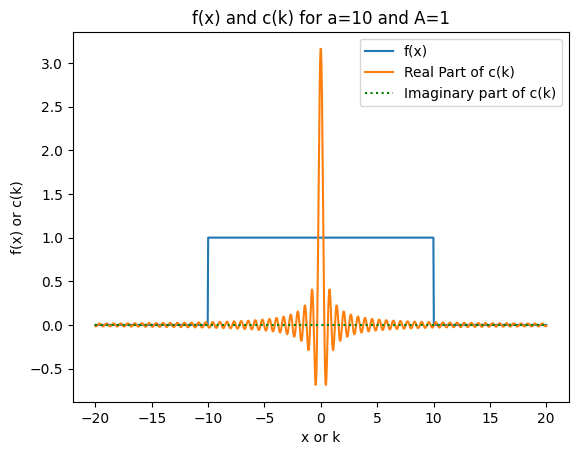

In [119]:
# subpart ii

# we now compare the effects of 'a' on the fourier transform of the function f(x), i.e. c(k)

# for a = 10 and A = 1
n = 1000
A = np.full(n,1)
a = np.full(n,10)
k = np.linspace(-20,20,num = n, endpoint = True)
v = v_fft(f,A,a,k)
plt.plot(k,v_f(A,a,k))
plt.plot(k,v[0])
plt.plot(k,v[1],':g')
plt.title('f(x) and c(k) for a=10 and A=1')
plt.legend(['f(x)','Real Part of c(k)','Imaginary part of c(k)'])
plt.ylabel("f(x) or c(k)")
plt.xlabel('x or k')
plt.show()

<ipython-input-89-3d8b56d75727>:13: IntegrationWarning: The occurrence of roundoff error is detected, which prevents 
  the requested tolerance from being achieved.  The error may be 
  underestimated.
  cos_integral,cos_error = integrate.quad(lambda x: f(A,a,x)*np.cos(k*x),-a,a,limit=1000)


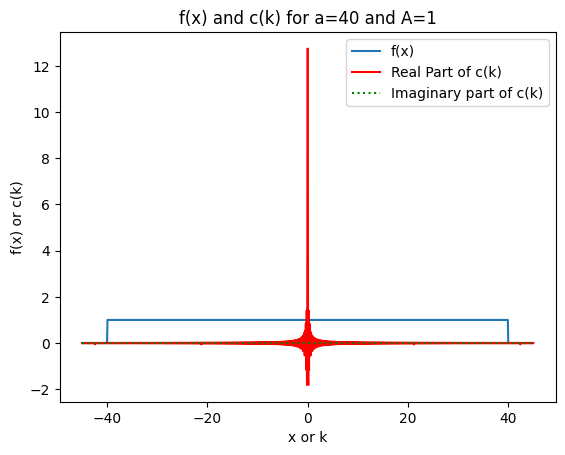

In [106]:
# for a = 40 and A = 1
n = 1000
A = np.full(n,1)
a = np.full(n,40)
k = np.linspace(-45,45,num = n, endpoint = True)
k1 = np.linspace(-45,0,num = n, endpoint = True)
k2 = np.linspace(0,45,num = n, endpoint = True)

v1 = v_fft(f,A,a,k1)
v2 = v_fft(f,A,a,k2)

plt.plot(k,v_f(A,a,k))
plt.plot(k1,v1[0],'-r')
plt.plot(k1,v1[1],':g')
plt.plot(k2,v2[0],'-r')
plt.plot(k2,v2[1],':g')
plt.title('f(x) and c(k) for a=40 and A=1')
plt.legend(['f(x)','Real Part of c(k)','Imaginary part of c(k)'])
plt.ylabel("f(x) or c(k)")
plt.xlabel('x or k')
plt.show()


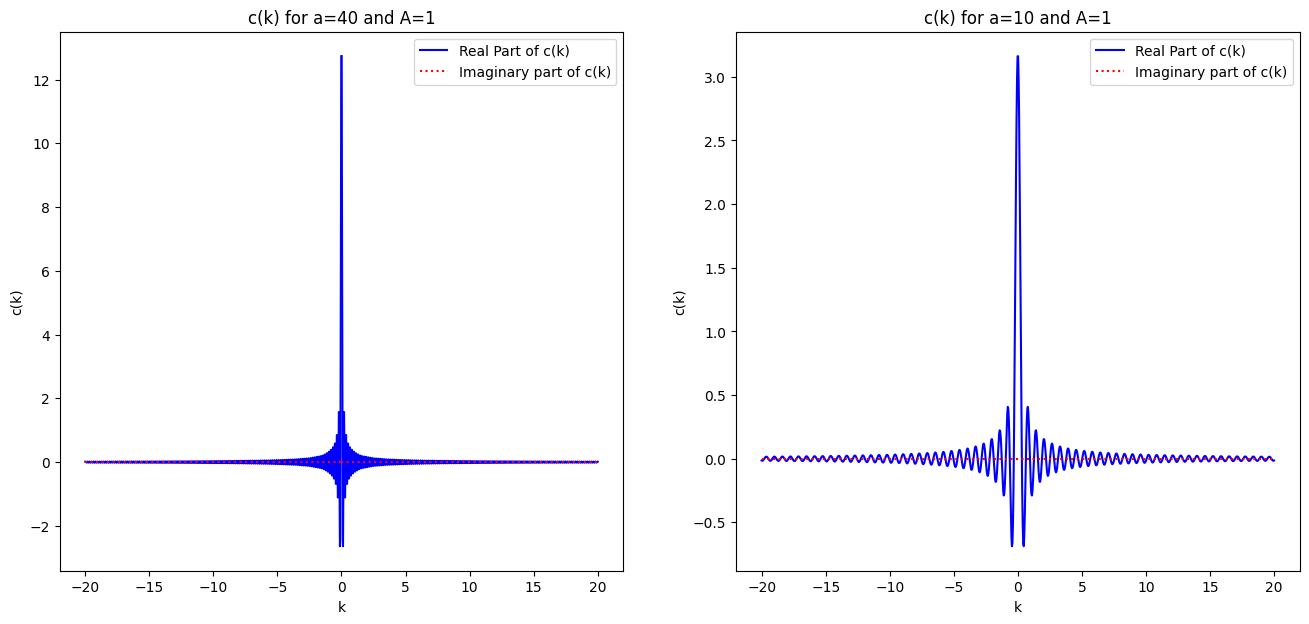

In [115]:
# to compare characteristics of the fourier transform for both a=40 and a=10, we plot the, side by side
n = 1000
a = np.full(n,40)
A = np.full(n,1)
k = np.linspace(-20,20,num = n, endpoint = True)
k1 = np.linspace(-20,0,num = n, endpoint = True)
k2 = np.linspace(0,20,num = n, endpoint = True)

fig = plt.figure()
fig.set_figwidth(16)
fig.set_figheight(7)

# a=40, A=1
plt.subplot(1,2,1)
v1 = v_fft(f,A,a,k1)
v2 = v_fft(f,A,a,k2)
plt.plot(k1,v1[0],'-b')
plt.plot(k1,v1[1],':r')
plt.plot(k2,v2[0],'-b')
plt.plot(k2,v2[1],':r')
plt.title('c(k) for a=40 and A=1')
plt.legend(['Real Part of c(k)','Imaginary part of c(k)'])
plt.ylabel("c(k)")
plt.xlabel('k')


# a=10, A=1
plt.subplot(1,2,2)
a = np.full(n,10)
v = v_fft(f,A,a,k)
plt.plot(k,v[0],'-b')
plt.plot(k,v[1],':r')
plt.title('c(k) for a=10 and A=1')
plt.legend(['Real Part of c(k)','Imaginary part of c(k)'])
plt.ylabel("c(k)")
plt.xlabel('k')

plt.show()


From the above two plots, following characteristics are clear:

Height or Maximum value for a=40 plot is 4 times more than that for a=10 plot

Width of the a=40 plot is less than that of the a=10 plot

Also, a=40 plot oscillates more than the a=10 plot

The imaginary part remains identically zero for both cases